In [1]:
import sklearn
sklearn.__version__

'1.2.2'

In [2]:
 # !pip install scikit-learn --user --upgrade 사이킷런 업그레이드

# 1.Linear Regression
### 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [7]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지 데이터 (독립변수)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터(종속 변수 - 결과)

In [8]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체생성
reg.fit(X, y) # 학습 모델 생성

LinearRegression()

In [10]:
y_pred = reg.predict(X) #x에 대한 예측값 출력
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

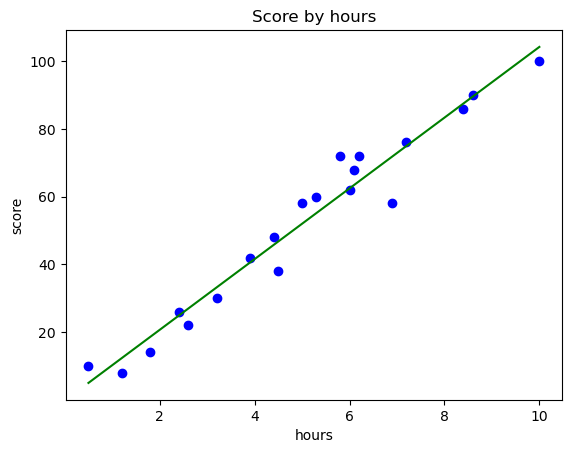

In [11]:
plt.scatter(X, y, color='blue') #삼전도
plt.plot(X, y_pred, color='green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score')
plt.show()

In [12]:
print('9시간 공부 했을 때 예상 점수 :', reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부 했을 때 예상 점수 : [93.77478776]


In [13]:
reg.coef_ # 기울기 m 값

array([10.44369694])

In [14]:
reg.intercept_ # y 절편 b의 값

-0.21848470286721522

y = mx + b -> 10.4436x - 0.2184

### 데이터 세트 분리

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [19]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 0.2는 20%가 테스트 세트로 분리

In [21]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [22]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [23]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [24]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [25]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [26]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화(훈련 세트)

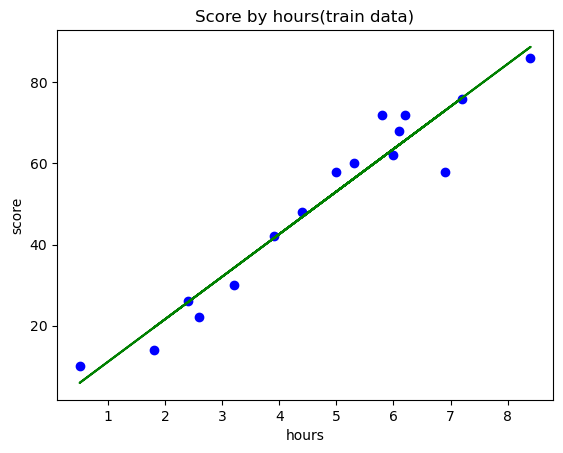

In [31]:
plt.scatter(X_train, y_train, color='blue') #삼전도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours(train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score')
plt.show()

### 데이터 시각화(테스트 세트)

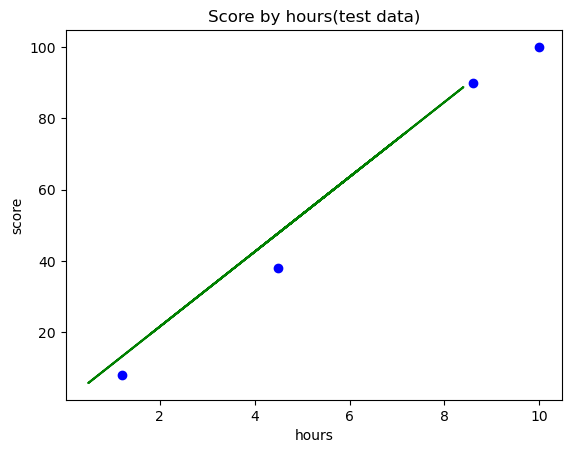

In [33]:
plt.scatter(X_test, y_test, color='blue') #삼전도
plt.plot(X_train, reg.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours(test data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score')
plt.show()

In [34]:
reg.coef_

array([10.49161294])

In [35]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [37]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [38]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

### 경사 하강법(Gradient Descent)

In [40]:
from sklearn.linear_model import SGDRegressor # SGD Stochastic Gradient Descent 확률적 경사 하강법

max_iter는 훈련 세트 반복 횟수(Epoch 횟수)
eta0는 확습률(learning rate)

In [42]:
# 지수 표기법
# 1e-3 = 0.001(10^-3)
# 1e-4 = 0.0001(10^-4)
# 1e+3 = 1000(10^3)
# 1e+4 = 10000(10^4)

sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1) # eta0의 default값은 0.01 
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

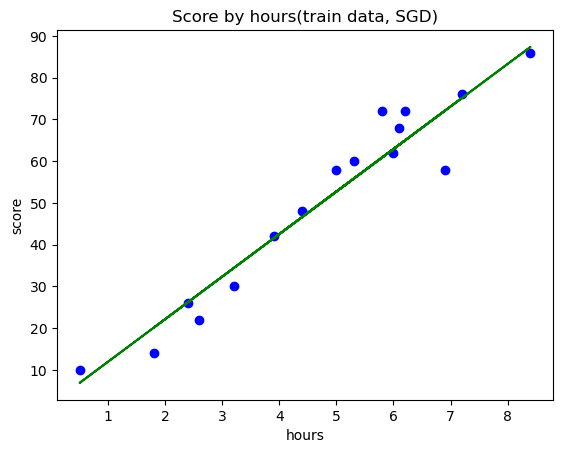

In [43]:
plt.scatter(X_train, y_train, color='blue') #삼전도
plt.plot(X_train, sr.predict(X_train), color='green') # 선 그래프
plt.title('Score by hours(train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score')
plt.show()

In [44]:
sr.coef_

array([10.19197471])

In [45]:
sr.intercept_

array([1.77603038])

In [46]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9748430825252619

In [47]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9347804758954794